<a href="https://colab.research.google.com/github/greenday1234/AI/blob/main/AudioPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import os

### Display Waveform

<ipython-input-12-2c81ec96a2fe>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


읽은 오디오 파일 수: 378
signal shape:  (39168,)


Text(0.5, 1.0, 'Waveform')

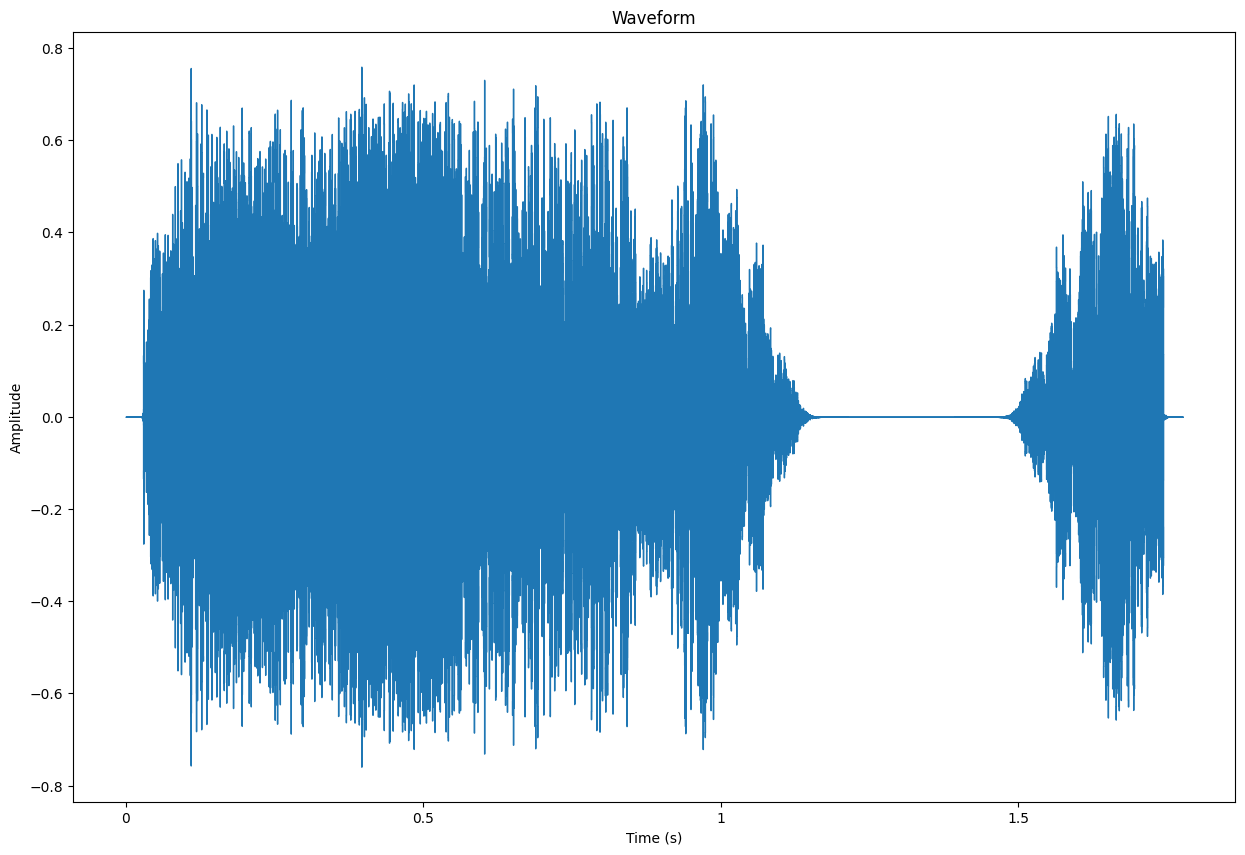

In [12]:
FIG_SIZE = (15, 10)
file_path = "/content/drive/MyDrive/Data"

audio_data = []
for root, dirs, files in os.walk(file_path):
    for file in files:
        if file.endswith('.wav') or file.endswith('.mp3'):
            file_path = os.path.join(root, file)
            y, sr = librosa.load(file_path, sr=None)
            audio_data.append((file_path, y, sr))

print("읽은 오디오 파일 수:", len(audio_data))

file_path, signal, sample_rate = audio_data[1]
signal, sample_rate = librosa.load(file_path, sr=22050)
print('signal shape: ', signal.shape)

plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

### FFT -> Power Spectrum

fft shape :  (347136,)
spectrum shape :  (347136,)
f shape :  (347136,)
left_sepctrum shape :  (173568,)
left_f shape :  (173568,)


Text(0.5, 1.0, 'Power spectrum')

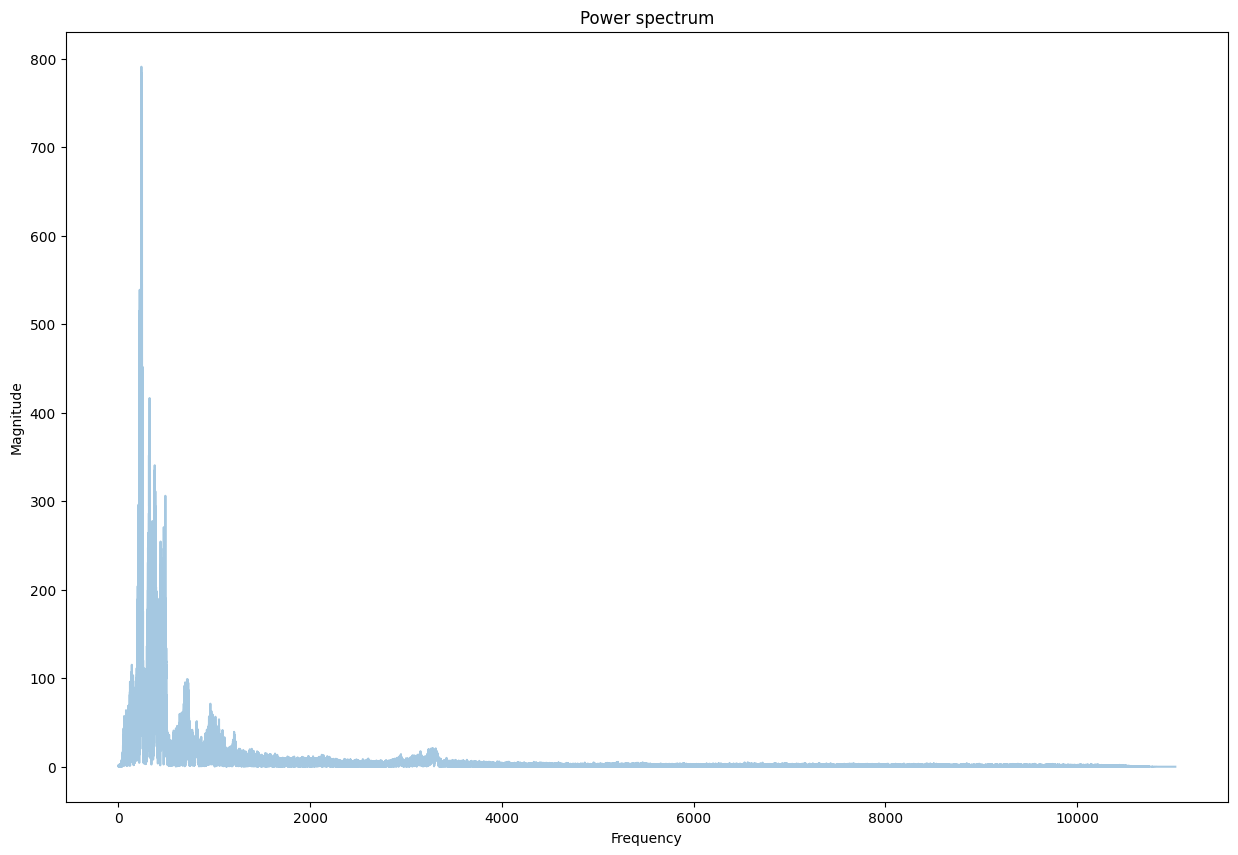

In [ ]:
fft = np.fft.fft(signal)
print("fft shape : ", fft.shape)

spectrum = np.abs(fft)
print("spectrum shape : ", spectrum.shape)

f = np.linspace(0, sample_rate, len(spectrum))
print("f shape : ", f.shape)

left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
print('left_sepctrum shape : ', left_spectrum.shape)

print('left_f shape : ', left_f.shape)

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

### STFT -> Spectrogram

STFT hop length duration is : 0.023219954648526078s
STFT window duration is : 0.09287981859410431s
stft shape :  (1025, 679)
spectrogram shape :  (1025, 679)


Text(0.5, 1.0, 'Spectrogram')

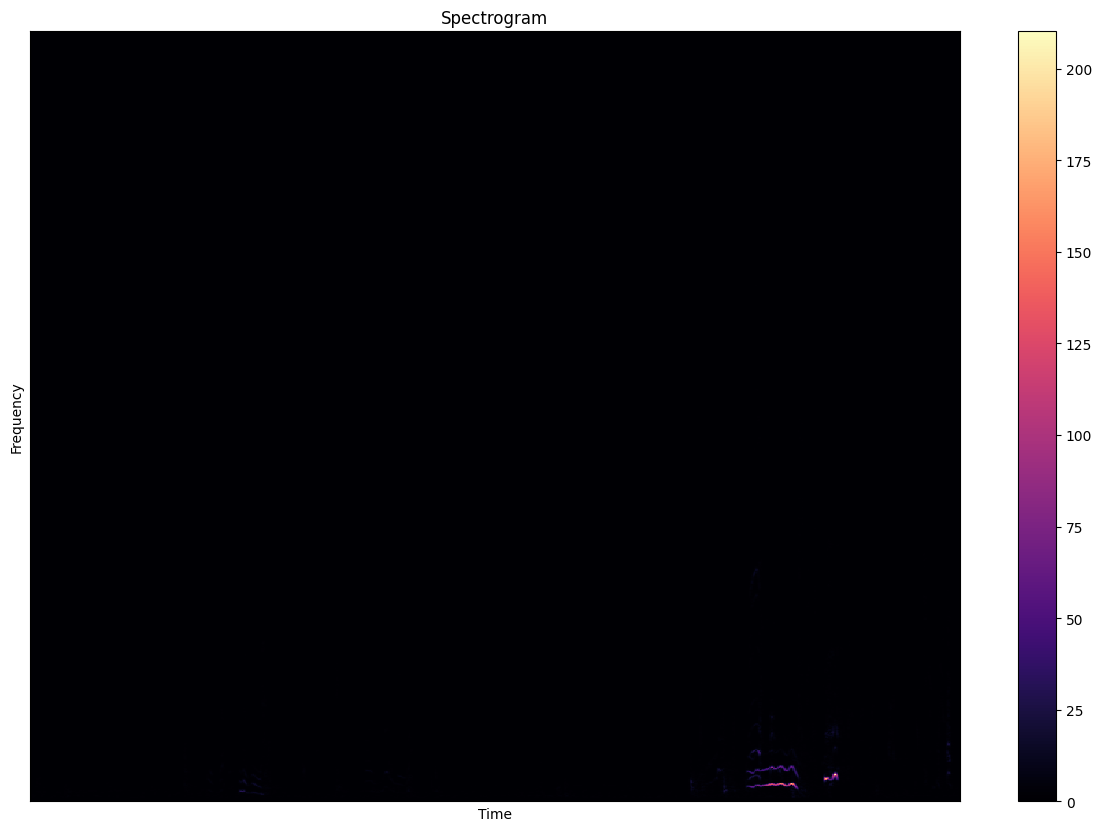

In [ ]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is : {}s".format(hop_length_duration))

print("STFT window duration is : {}s".format(n_fft_duration))

stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
print("stft shape : ", stft.shape)

spectrogram = np.abs(stft)
print("spectrogram shape : ", spectrogram.shape)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

### Cast Amplitude to Decibels (apply logarithm)
진폭을 데시벨로 캐스팅

log spectrogram shape :  (1025, 679)


Text(0.5, 1.0, 'Spectrogram *dB')

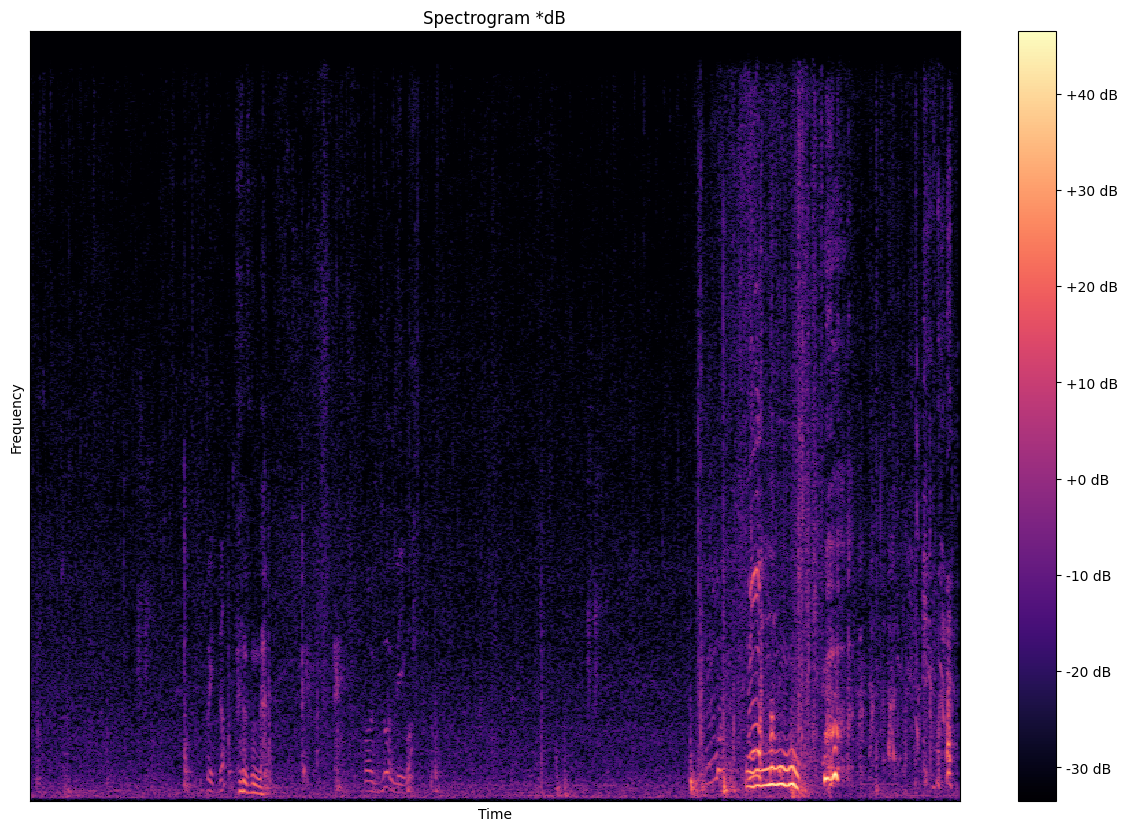

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
print("log spectrogram shape : ", log_spectrogram.shape)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram *dB")

### MFCCs

MFCCs.shape :  (13, 679)


Text(0.5, 1.0, 'MFCCs')

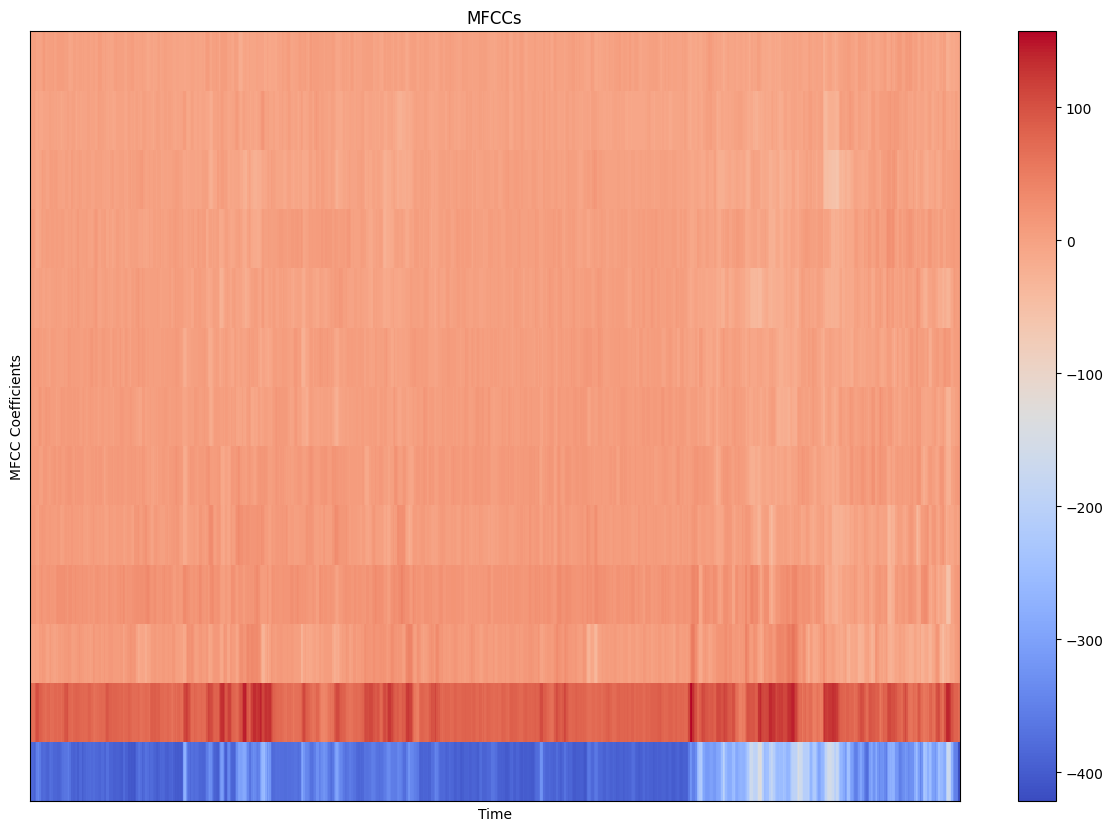

In [ ]:
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

print('MFCCs.shape : ', MFCCs.shape)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.colorbar()
plt.title("MFCCs")